In [189]:
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere, plot_bloch_vector
import matplotlib as plt

from qiskit import QuantumCircuit as QC

### 1. The Atoms of Computation

This is the start of the notebook and has all the examples that will be there used in the prepration phase.

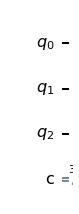

In [2]:
#The first quantum algorithm
#Drawing the first Quantum Circuit
n = 3
n_q = n
n_b = n
qc_output = QuantumCircuit(n_q,n_b)
qc_output.draw('mpl')

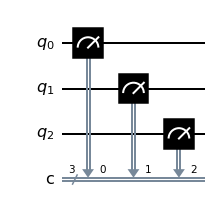

In [3]:
#Measuring the result
for i in range(n):
    qc_output.measure(i,i)

#qc_output.measure_all()
qc_output.draw('mpl')

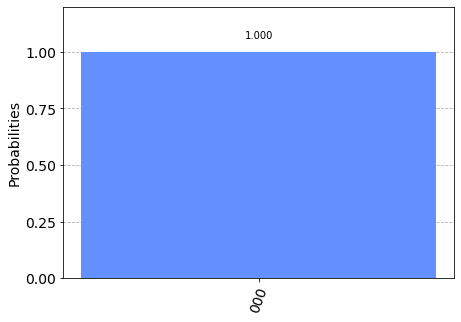

In [6]:
#Simulating and plotting the results
sim = Aer.get_backend('qasm_simulator') #The simulator used 
qobj = assemble(qc_output) #This command turns the circuit into an object which the simulator can run
result = sim.run(qobj).result() #After execution of the experiment we get the result of the experiment
#in the form of a dict which is the number of counts that we have
counts = result.get_counts()
#Displaying the result that we get
plot_histogram(counts)

In [50]:
for backends in Aer.backends():
    print(backends.name())

qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


### Simple Adder

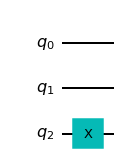

In [51]:
qc_encode = QuantumCircuit(n)
qc_encode.x(n-1)
qc_encode.draw('mpl')

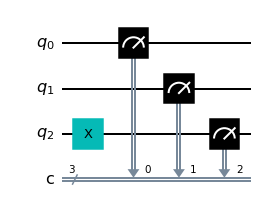

In [52]:
qc = qc_encode + qc_output
qc.draw('mpl')

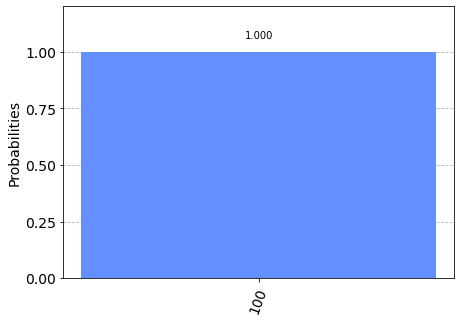

In [53]:
qobj = assemble(qc)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

#### CNOT & Taffoli Gate Implementation

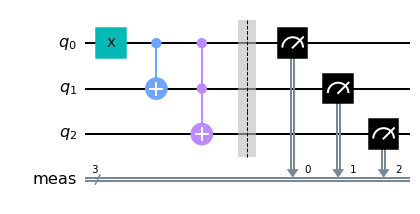

In [65]:
#CNOT
qc = QuantumCircuit(n)

qc.x(0)
qc.cx(0,1)
qc.ccx(0,1,2)

qc.measure_all()
qc.draw('mpl')

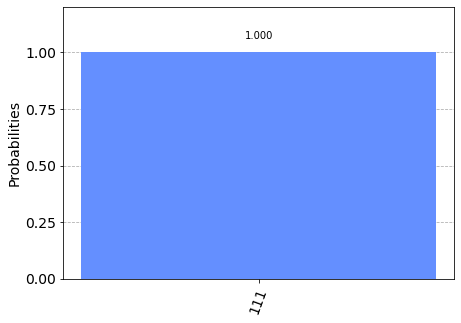

In [66]:
backend = Aer.get_backend('qasm_simulator')
qobj = assemble(qc)
counts = backend.run(qobj).result().get_counts()
plot_histogram(counts)

### 2. Representing Qubit States

In [162]:
from math import sqrt, pi

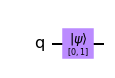

In [163]:
qc = QuantumCircuit(1)
initial_state = [0,1]
qc.initialize(initial_state,0)
qc.draw('mpl')

In [164]:
sim = Aer.get_backend('statevector_simulator')
#qc.save_statevector()
qobj = assemble(qc)
result = sim.run(qobj).result()

In [165]:
out_state = result.get_statevector()
print(out_state)

[0.+0.j 1.+0.j]


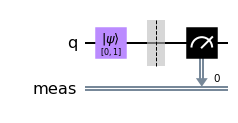

In [166]:
qc.measure_all()
qc.draw('mpl')

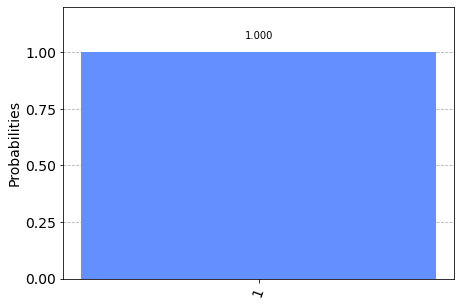

In [167]:
counts = result.get_counts()
plot_histogram(counts)

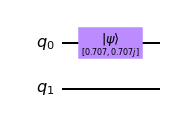

In [168]:
#Superposition
qc = QuantumCircuit(2)
initial_state = [1/sqrt(2), 1j/sqrt(2)]
qc.initialize(initial_state,0)
qc.draw('mpl')

In [169]:
backend = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
result = backend.run(qobj).result()
state = result.get_statevector()

print(state)

[0.70710678+0.j         0.        +0.70710678j 0.        +0.j
 0.        +0.j        ]


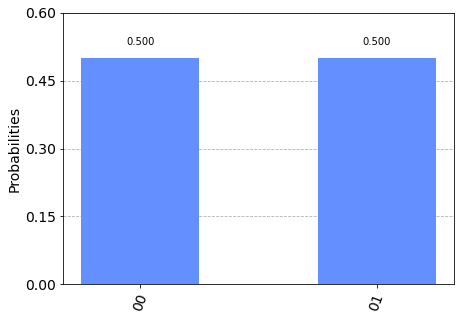

In [170]:
counts = result.get_counts()
plot_histogram(counts)

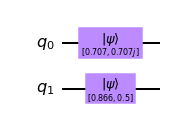

In [171]:
initial_vector = [sqrt(3/4),1/sqrt(4)]
qc.initialize(initial_vector,1)
qc.draw('mpl')

In [172]:
qc.measure_all()

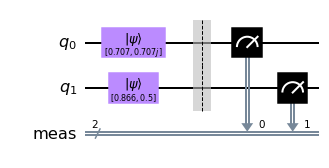

In [173]:
qc.draw('mpl')

In [174]:
qobj = assemble(qc)
result = backend.run(qobj).result()
counts = result.get_counts()

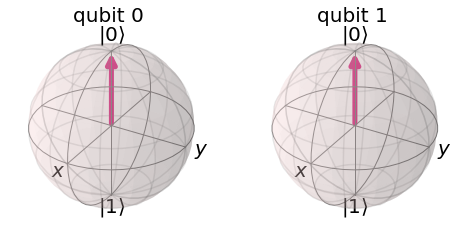

In [175]:
state = result.get_statevector()
plot_bloch_multivector(state)

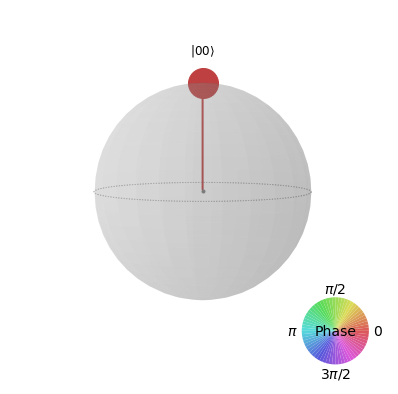

In [176]:
plot_state_qsphere(state)

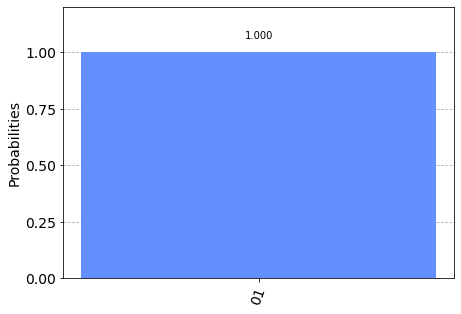

In [116]:
plot_histogram(counts)

### 3. Single Qubit Gates

Pauli X Gate

In [142]:
qc = QuantumCircuit(1)

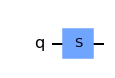

In [143]:
qc.s(0)
qc.draw('mpl')

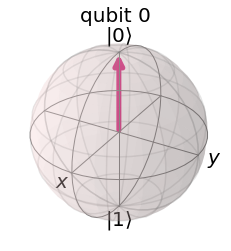

In [144]:
backend = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
result = backend.run(qobj).result().get_statevector()
plot_bloch_multivector(result)

In [177]:
Aer.backends()

[QasmSimulator(
 backend_name='qasm_simulator', provider=AerProvider()),
 StatevectorSimulator(
 backend_name='statevector_simulator', provider=AerProvider()),
 UnitarySimulator(
 backend_name='unitary_simulator', provider=AerProvider()),
 PulseSimulator(
 backend_name='pulse_simulator', provider=AerProvider())]

In [180]:
BasicAer.backends()

[<QasmSimulatorPy('qasm_simulator') from BasicAer()>,
 <StatevectorSimulatorPy('statevector_simulator') from BasicAer()>,
 <UnitarySimulatorPy('unitary_simulator') from BasicAer()>]

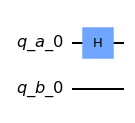

In [187]:
q_a = QuantumRegister(1,'q_a')
q_b = QuantumRegister(1,'q_b')

qc = QuantumCircuit(q_a,q_b)

qc.h(0)
#qc.z(0)

qc.draw('mpl')

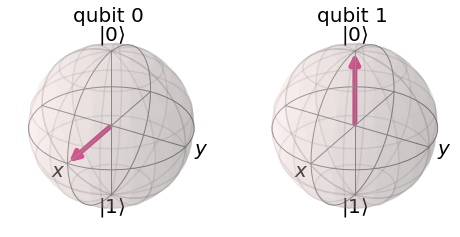

In [188]:
backend = BasicAer.get_backend('statevector_simulator')
result = execute(qc,backend).result()
sv = result.get_statevector()
plot_bloch_multivector(sv)

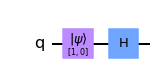

In [228]:
qc = QC(1)
in_state = [1,0]
qc.initialize(in_state,0)
qc.h(0)
#qc.z(0)
#qc.y(0)
#qc.x(0)
#qc.p(pi/4,0)
#qc.s(0)
#qc.sdg(0)


qc.draw('mpl')

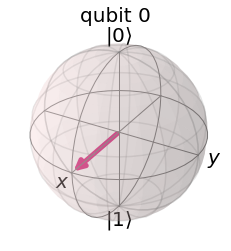

In [229]:
backend = BasicAer.get_backend('statevector_simulator')
result = execute(qc,backend).result()
sv = result.get_statevector()
plot_bloch_multivector(sv)

In [230]:
string = qc.qasm()
string

'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[1];\ninitialize(1,0) q[0];\nh q[0];\n'

In [236]:
circ = QuantumCircuit.from_qasm_str(qc.qasm())
circ.draw('mpl')

QasmError: "Cannot find gate definition for 'initialize', line 4 file "